In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [5]:
import os
from PIL import Image

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2 as cv
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

In [7]:
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            # Load the image in grayscale and preprocess
            img = cv.imread(image_path, cv.IMREAD_GRAYSCALE).astype('float32')
            img = cv.resize(img, (64, 64)) / 255.0  # Resize and normalize

            if img is not None:
                images.append(img)
                # Extract label from filename
                label = filename.split('_')[-1].split('.')[0]  # Extracts the letter before file extension
                labels.append(label)
    return np.array(images), np.array(labels)

In [8]:
# Example usage
folder_path = 'new_dataset'
images, labels = load_images_from_folder(folder_path)

In [9]:
# Printing first 5 entries
for i in range(5):
    print(f"Label: {labels[i]} | Image Size: {images[i].size}")

Label: a | Image Size: 4096
Label: n | Image Size: 4096
Label: b | Image Size: 4096
Label: r | Image Size: 4096
Label: z | Image Size: 4096


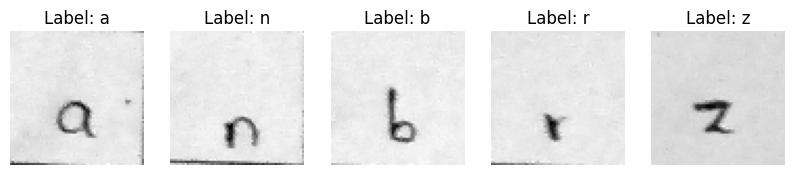

In [10]:
import matplotlib.pyplot as plt

# Plot some images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

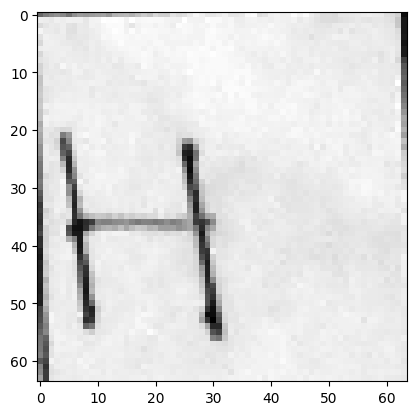

In [11]:
plt.gray()
plt.imshow(images[100])

In [12]:
print("Number of images:", len(images))
print("Shape of each image:", images.shape[1:])
print("Unique labels:", np.unique(labels))

Number of images: 2046
Shape of each image: (64, 64)
Unique labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j'
 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [14]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [15]:
# Reshape for CNN
X_train = X_train.reshape(-1, 64, 64, 1)
X_val = X_val.reshape(-1, 64, 64, 1)

In [16]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(labels_encoded)), activation='softmax')
])

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.0192 - loss: 3.9647 - val_accuracy: 0.0220 - val_loss: 3.9503
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0331 - loss: 3.9461 - val_accuracy: 0.0415 - val_loss: 3.9392
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0527 - loss: 3.8916 - val_accuracy: 0.0707 - val_loss: 3.7611
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1164 - loss: 3.5250 - val_accuracy: 0.1244 - val_loss: 3.5277
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2298 - loss: 3.0881 - val_accuracy: 0.1805 - val_loss: 3.4650
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3513 - loss: 2.6095 - val_accuracy: 0.2146 - val_loss: 3.3180
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4716 - loss: 2.0865 - val_accuracy: 0.2463 - val_loss: 3.2502
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5802 - loss: 1.5928 - val_accuracy: 0.3317 - v

In [19]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3890 - loss: 4.6969
Validation Accuracy: 38.29%


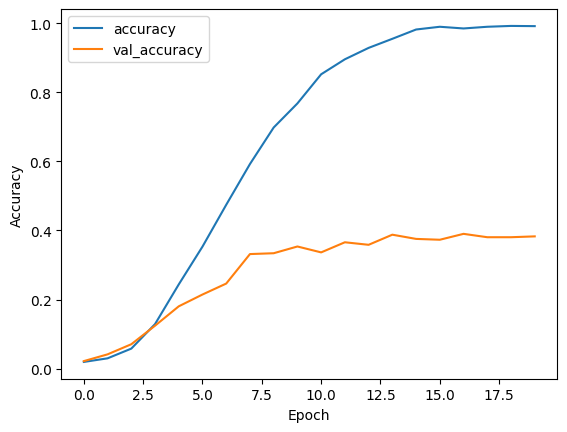

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
import joblib

# Save the label encoder
joblib.dump(le, 'label_encoder_3.pkl')

['label_encoder_3.pkl']

In [22]:
model.save("recognition_model_3.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted label: n


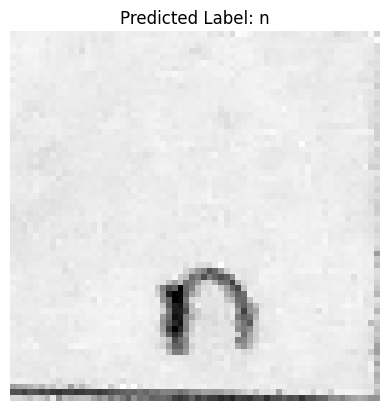

In [25]:
from tensorflow.keras.models import load_model

def load_and_preprocess_image(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE).astype('float32')
    img = cv.resize(img, (64, 64)) / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return img

# Load the trained model and label encoder
model = load_model('recognition_model_3.h5')
le = joblib.load('label_encoder_3.pkl')

# Path to the test image
test_image_path = 'new_dataset/00001_n.jpeg'
test_image = load_and_preprocess_image(test_image_path)

# Predict the label
prediction = model.predict(test_image)
predicted_label_index = np.argmax(prediction)
predicted_label = le.inverse_transform([predicted_label_index])[0]

print(f"Predicted label: {predicted_label}")

# Display the test image
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()
